In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# @title Default title text
!pip install pyLDAvis


In [ ]:
pip install --upgrade pip

In [ ]:
pip install fastapi kaleido python-multipart uvicorn

In [ ]:
pip install numpy==1.23.5 pandas==1.4.4

In [ ]:
import pyLDAvis # package to interpret the topics in a topic model
import pyLDAvis.gensim_models # python library for the interactive topic modeling visualization
import pickle # for html export
import pandas as pd # for data processing
import os # for setting working directory
import re # regular expression library
from wordcloud import WordCloud # for generating word clouds
import gensim # open-source library for unsupervised topic modeling, document indexing
from gensim.utils import simple_preprocess
import nltk # python tool kit for NLP
nltk.download('stopwords')
from nltk.corpus import stopwords # for removing stop words
import gensim.corpora as corpora # for mapping words to integers
import warnings
warnings.filterwarnings("ignore")


In [ ]:
pip install pyLDAvis

In [ ]:
import pandas as pd


In [ ]:
papers = pd.read_csv("/content/drive/MyDrive/Result.csv")
print(type(papers))
print("The shape of data --->",papers.shape)
papers.head(10) # Print head

<class 'pandas.core.frame.DataFrame'>
The shape of data ---> (812, 3)


,Unnamed: 0,Prompt,Answer
0,0,How to add a java class in a generic container...,To add a Java class in a generic container fro...
1,1,Show me code only,Certainly! Here's an example code snippet that...
2,2,But I say to add a physical java class inside ...,Apologies for the confusion. If you want to ad...
3,3,How to run a java class inside of a container ...,To run a Java class inside a container using T...
4,4,I need to add a java class dynamically to exec...,To dynamically add and execute a Java class us...
5,5,Create a python script to send a DNS packet us...,Creating a Python script to send a DNS packet ...
6,6,encrypt the payload using AES,"Sure, I can help you modify the Python script ..."
7,7,explain this code\n\nimport collections\nimpor...,This code defines a language classifier based ...
8,8,write docstrings for each method,Certainly! Here are the docstrings added to ea...
9,9,explain this code\n\nimport enum\nimport json\...,This code defines a class called CorefIOBHeuri...


In [ ]:
# print(papers.columns)
print(papers['Prompt'])
print(len(papers['Prompt']))

0      How to add a java class in a generic container...
1                                      Show me code only
2      But I say to add a physical java class inside ...
3      How to run a java class inside of a container ...
4      I need to add a java class dynamically to exec...
                             ...                        
807    When does a packet get duplicated and sent to ...
808    Is `SO_REUSEPORT` portable across Linux, Windo...
809    How do the 2 options work when using TCP socke...
810    Let's go back to when we have 2 interfaces (in...
811    Without using `SO_REUSEADDR` and `SO_REUSEPORT...
Name: Prompt, Length: 812, dtype: object
812


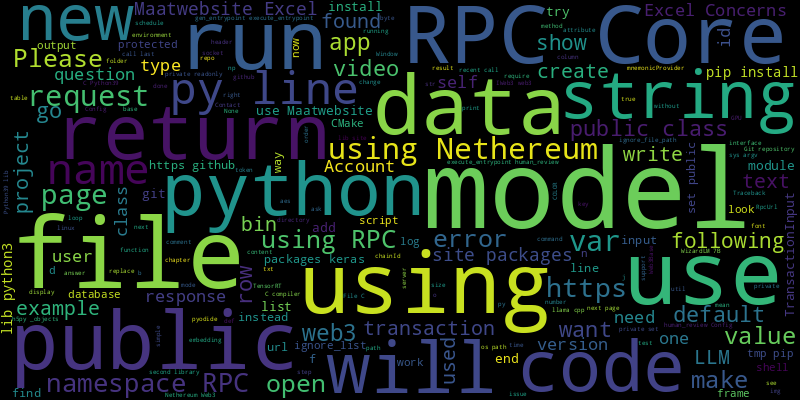

In [ ]:
string_values = papers['Prompt'].astype(str).replace('nan', '').values

# Join the strings with a comma
long_string = ','.join(string_values)
# this join whenver it faces any float values or null value or integers it will throw error. it can deal only strings
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(long_string)
wordcloud.generate(long_string)

# # Visualize the word cloud
wordcloud.to_image()

In [ ]:
stop_words = stopwords.words('english')
stop_words.extend(['the','a','from', 'subject', 're', 'edu', 'used','using','use','model','one','two','set'])
"""
    Functions for converting sentence to words
"""
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
"""
    Functions removing the stopwords
"""
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]

data = papers['Prompt'].tolist()#creating the array of token
print(data)
data_words = list(sent_to_words(data))#converting them into list

data_words = remove_stopwords(data_words)# remove stop words
print(data_words)
print(len(data_words))

['How to add a java class in a generic container from testcontainers in order to run later', 'Show me code only', 'But I say to add a physical java class inside of the generic container', 'How to run a java class inside of a container with testcontainers?', 'I need to add a java class dynamically to execute it and receive the results', 'Create a python script to send a DNS packet using scapy with a secret payload', 'encrypt the payload using AES', 'explain this code\n\nimport collections\nimport math\nimport os\nimport pickle\nimport typing\n\nimport nltk\nfrom nltk.corpus import udhr\nfrom ovos_utils.xdg_utils import xdg_data_home\n\n\nclass LMLangClassifier:\n    def __init__(self, path=None):\n        if path:\n            with open(path, "rb") as f:\n                self.language_models = pickle.load(f)\n            print(f"lang models loaded from {path}")\n        else:\n            self.fit()\n\n    def fit(self, save=True):\n        model = f"{xdg_data_home()}/ovos-classifiers/l

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Printing the corpus in a numeric form which implies the frequency of the word
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


In [ ]:
path = '/content/drive/MyDrive/SE_PROJECT/gopi.pkl'

# Create a directory to save the HTML file
output_directory = '/content/drive/MyDrive/SE_PROJECT/qn1'
os.makedirs(output_directory, exist_ok=True)

with open(path, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

# Save HTML file in the specified directory
html_path = os.path.join(output_directory, 'ldavis_prepared_' + str(num_topics) + '.html')
pyLDAvis.save_html(LDAvis_prepared, html_path)

# Print the path where the HTML file is saved
print(f"HTML file saved at: {html_path}")

# You can also return the path or use it further in your code
# For example, you might want to open the file in a web browser
import webbrowser
webbrowser.open(html_path)

HTML file saved at: /content/drive/MyDrive/SE_PROJECT/qn1/ldavis_prepared_10.html


False

In [ ]:
from pprint import pprint
# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.010*"page" + 0.009*"public" + 0.007*"next" + 0.006*"want" + 0.006*"list" '
  '+ 0.006*"task" + 0.005*"rpc" + 0.005*"data" + 0.005*"core" + '
  '0.005*"python"'),
 (1,
  '0.017*"public" + 0.013*"py" + 0.012*"rpc" + 0.010*"file" + 0.009*"web" + '
  '0.008*"core" + 0.008*"string" + 0.007*"line" + 0.007*"new" + '
  '0.007*"python"'),
 (2,
  '0.008*"data" + 0.007*"run" + 0.006*"page" + 0.005*"io" + 0.005*"info" + '
  '0.005*"healthchecks" + 0.005*"null" + 0.005*"list" + 0.004*"https" + '
  '0.004*"file"'),
 (3,
  '0.019*"public" + 0.011*"web" + 0.011*"core" + 0.010*"rpc" + 0.010*"file" + '
  '0.009*"py" + 0.008*"string" + 0.007*"new" + 0.007*"private" + '
  '0.007*"request"'),
 (4,
  '0.018*"python" + 0.011*"file" + 0.009*"line" + 0.008*"install" + '
  '0.008*"library" + 0.007*"py" + 0.007*"path" + 0.007*"self" + '
  '0.007*"pyodide" + 0.006*"module"'),
 (5,
  '0.014*"python" + 0.008*"py" + 0.007*"packages" + 0.006*"file" + '
  '0.006*"data" + 0.006*"page" + 0.006*"pip" + 0.006*"l

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
path='/content/drive/MyDrive/SE_PROJECT/gopi.pkl'

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(path, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(path, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared,'ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.020622  0.055129       1        1  19.315845
5      0.028444 -0.059944       2        1  12.224176
9      0.095571  0.006345       3        1  11.063219
1     -0.015280  0.022840       4        1  10.601396
8     -0.035931  0.075947       5        1  10.507249
6      0.075906 -0.002431       6        1   9.140893
2     -0.047960 -0.074042       7        1   7.587007
0     -0.055551 -0.069791       8        1   7.225707
4      0.068611  0.014535       9        1   6.618456
7     -0.093188  0.031413      10        1   5.716053, topic_info=             Term       Freq      Total Category  logprob  loglift
51         python  55.000000  55.000000  Default  30.0000  30.0000
518       library  14.000000  14.000000  Default  29.0000  29.0000
158        public  64.000000  64.000000  Default  28.0000  28.0000
331          page  20.000000  20.000000  Default  27.0000  27.0000
90          derby   7.000000   7.000000  Default  26.0000  26.0000
...           ...        ...        ...      ...      ...      ...
69            get   1.642581  22.928424  Topic10  -5.4811   0.2258
155     namespace   1.561900  19.590623  Topic10  -5.5315   0.3327
1045  gassettings   1.428158  14.485106  Topic10  -5.6210   0.5452
262          data   1.628009  34.581881  Topic10  -5.4900  -0.1941
382          base   1.404715  15.948304  Topic10  -5.6376   0.4324

[729 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
1667      4  0.681852          aber
985       2  0.791483        access
0         6  0.659553        across
1783     10  0.590312       actions
217       1  0.230627           add
...     ...       ...           ...
61        3  0.248363           zip
61        6  0.248363           zip
61        9  0.496726           zip
1913      6  0.659554        ziplet
95        3  0.695576  zusatzfutter

[1385 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 6, 10, 2, 9, 7, 3, 1, 5, 8])